In [1]:
import pandas as pd
df = pd.read_csv('concatenated_reviews.csv')

In [2]:
df['title_body'] = df['title'] + ' ' + df['body']

In [3]:
# step 1: data collection
documents = df['title_body'].astype(str).tolist()

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # remove the word 'book'
    text = re.sub(r'book', '', text)

    # remove the word 'read'
    text = re.sub(r'read', '', text)

    # remove the word 'reading'
    text = re.sub(r'reading', '', text)

    # remove the word 'books'
    text = re.sub(r'books', '', text)

    # remove the word 'story'
    text = re.sub(r'story', '', text)

    # remove the word 'one'
    text = re.sub(r'one', '', text)

    # remove the word 'love'
    text = re.sub(r'love', '', text)

    # remove "ing"
    text = re.sub(r'ing', '', text)

    # remove the word "really"
    text = re.sub(r'really', '', text)

    # remove anying that in not a noun
    text = re.sub(r'adjective', '', text)
    text = re.sub(r'adjectives', '', text)
    text = re.sub(r'adverbs', '', text)

    # remove the word adjectives
    text = re.sub(r'good', '', text)
    text = re.sub(r'great', '', text)
    text = re.sub(r'best', '', text)
    text = re.sub(r'better', '', text)
    text = re.sub(r'bad', '', text)
    text = re.sub(r'worst', '', text)
    text = re.sub(r'worse', '', text)
    text = re.sub(r'awesome', '', text)
    text = re.sub(r'awful', '', text)
    text = re.sub(r'fantastic', '', text)
    text = re.sub(r'horrible', '', text)
    text = re.sub(r'interesting', '', text)
    text = re.sub(r'boring', '', text)
    text = re.sub(r'exciting', '', text)
    text = re.sub(r'dull', '', text)
    text = re.sub(r'entertaining', '', text)
    

    # Remove punctuation and non-alphanumeric characters
    text = re.sub(r'\W', ' ', text)

    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize the words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]

    return ' '.join(tokens)

# Assuming 'documents' is your list of text documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/grahammarsh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/grahammarsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/grahammarsh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


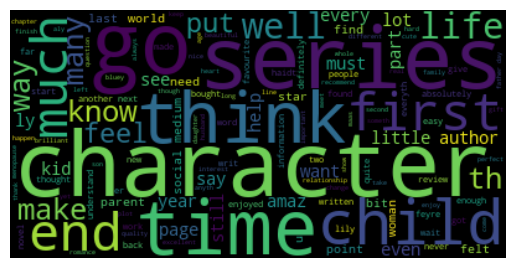

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(preprocessed_documents)

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Step 3: Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(preprocessed_documents)

In [9]:
from sklearn.cluster import KMeans
# Step 4: Model Training
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [12]:
from sklearn.metrics import silhouette_score

# Assuming 'X' is your TF-IDF feature matrix and 'kmeans' is your trained K-means model
labels = kmeans.labels_

score = silhouette_score(X, labels)
print('Silhouette Score: ', score)

Silhouette Score:  0.016939742518411443


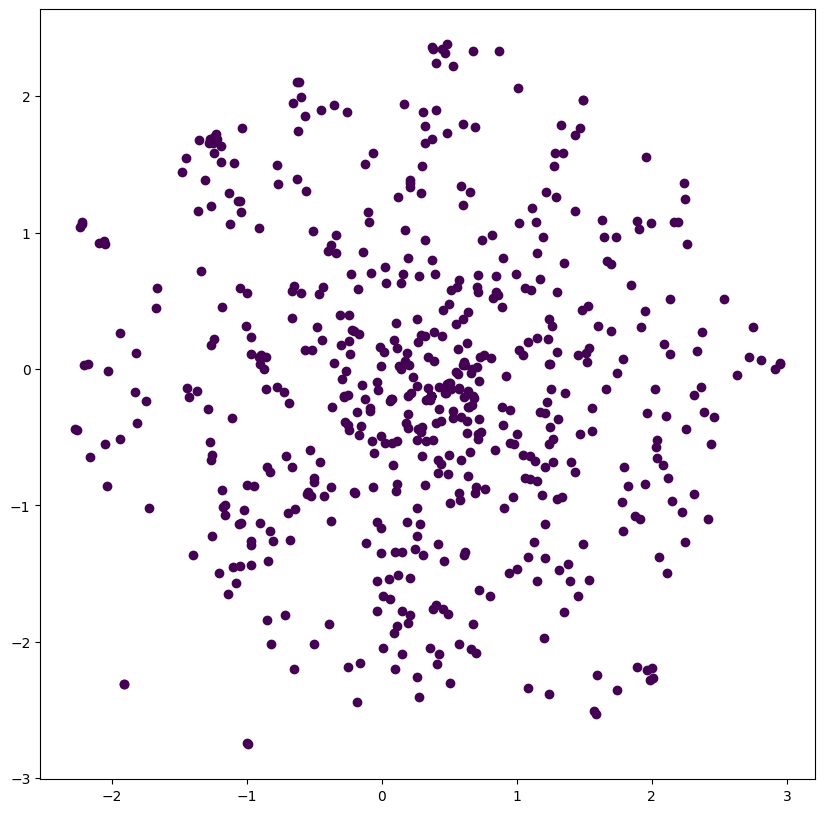

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'X' is your TF-IDF feature matrix and 'kmeans' is your trained K-means model
labels = kmeans.labels_

# Reduce dimensionality to 2D
tsne = TSNE(n_components=2, init='random', random_state=0)
X_2d = tsne.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(10, 10))
for i in range(len(X_2d)):
    plt.scatter(X_2d[i, 0], X_2d[i, 1], c=labels[i], cmap='viridis')

plt.show()

In [ ]:

# Step 6: Interpretation is usually done after this step, but it's not shown here